# **01.020 Design Thinking Project III - Term 3** 
### SC02 Group 1
* Chua Min Pei (1005340)
* Sim Yu Hui, Kellie (1004204)
* Ryan Kaw Zheng Da (1005144)
* Eunice Kwok Xiu Yi (1005469)
* Ng Zhen An (1005527)

---

Task 1: Build a Multiple Linear Regression model that predicts the number of deaths in various countries due to COVID-19.

* Find data sets for the number of deaths in various countries (a minimum of 20 countries) due to COVID-19.
* Research for appropriate predictor variables to predict deaths due to COVID-19.
* You may use time as one of the predictors (in which case you could attempt to predict death rates in the future), or you may choose to leave it out (in which case, you would be looking at the deaths at a fixed chosen point in time).
*  Find data sets on the chosen predictors for the various countries in the model.
* Use plots to visualize and understand your data.
* Build a model and test the accuracy of your model, using an appropriately chosen metric
(hint: r2 is not a good metric for this task).
* If needed, improve your model by incorporating other predictors, and/or removing existing ones.
*Discuss your data sets, model, accuracy, and what metrics you used to judge the accuracy.


---


Task 2: You are free to find and define a problem (apply the discovery and define phases first, from the UK Design Council Double Diamond, 3.007 Design Thinking and Innovation) of your interest related to COVID-19. The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression, which means you can work with either continuous numerical data or classification.
* Find an interesting problem which you want to solve either using Linear Regression or Classification (please check with your instructors first on whether the problem makes sense).
* Find a dataset to build your model. For example, you can use Kaggle
(https://www.kaggle.com/datasets) to find suitable datasets.
* Use plots to visualize and understand your data.
* Create training and test data sets.
* Build your model.
* Choose an appropriate metric to evaluate your model (you may use the same metric as the one used in Task 1).
* Improve your model.

  

# Task 1

Task 1: Build a Multiple Linear Regression model that predicts the number of deaths in various countries due to COVID-19.

* Find data sets for the number of deaths in various countries (a minimum of 20 countries) due to COVID-19.
* Research for appropriate predictor variables to predict deaths due to COVID-19.
* You may use time as one of the predictors (in which case you could attempt to predict death rates in the future), or you may choose to leave it out (in which case, you would be looking at the deaths at a fixed chosen point in time).
*  Find data sets on the chosen predictors for the various countries in the model.
* Use plots to visualize and understand your data.
* Build a model and test the accuracy of your model, using an appropriately chosen metric
(hint: r2 is not a good metric for this task).
* If needed, improve your model by incorporating other predictors, and/or removing existing ones.
*Discuss your data sets, model, accuracy, and what metrics you used to judge the accuracy.


---


For Task 1, an implementation of your final multiple linear regression model in Excel; the Excel spreadsheet needs to be annotated and interactive (i.e. contains formulas, so that changing the data input results in different output).

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pre-Process Data

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Working_With_Data.ipynb

In [ ]:
# # Mount Google Drive in order to import dataset
# from google.colab import drive
# drive.mount('/content/gdrive')

In [31]:
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

Cloning into 't3-2d-ddw'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 63 (delta 30), reused 45 (delta 17), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [8]:
# !git clone https://github.com/owid/covid-19-data

Cloning into 'covid-19-data'...
remote: Enumerating objects: 224081, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 224081 (delta 13), reused 29 (delta 6), pack-reused 224017
Receiving objects: 100% (224081/224081), 42.08 GiB | 27.20 MiB/s, done.
Resolving deltas: 100% (180505/180505), done.
Checking out files: 100% (1662/1662), done.


In [33]:
# Import dataset
# file_url = 'covid-19-data/public/data/owid-covid-data.csv'
file_url = 't3-2d-ddw/task-1/owid-covid-data-1811.csv'
df = pd.read_csv(file_url)
df.reset_index(drop=True, inplace=True)
# df.dropna()

# # converting location to categories
# df['location'] = df['location'].astype('category')
# df['location'] = df['location'].cat.codes 

In [34]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134015,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,8838.556,4.241,2.130,311.155,0.133,0.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2198.0,1409076.0,93.365,0.146,2453.0,0.163,0.013,76.3,tests performed,6155370.0,3462939.0,2692431.0,NaN,25012.0,21192.0,40.79,22.95,17.84,NaN,1404.0,14044.0,0.093,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134016,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,8840.875,2.319,2.281,311.155,0.000,0.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2660.0,1411736.0,93.541,0.176,2667.0,0.177,0.013,77.5,tests performed,6165714.0,3469198.0,2696516.0,NaN,10344.0,20608.0,40.85,22

In [47]:
df_copy = df.copy()

In [48]:
countries_list = ['ALB', 'DZA', 'AND', 'AUS', 'AUT', 'AZE', 'BHS', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BIH', 'BWA', 'BRA',
       'BRN', 'BGR', 'BDI', 'KHM', 'CAN', 'CPV', 'TCD', 'CHN', 'COL',
       'COG', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DOM',
       'ECU', 'EGY', 'SLV', 'ERI', 'SWZ', 'ETH', 'FRO', 'FIN', 'FRA',
       'GAB', 'GEO', 'DEU', 'GRC', 'GRL', 'GUM', 'GTM', 'GUY', 'HTI',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'KAZ', 'KEN', 'KIR', 'KGZ', 'LAO', 'LVA', 'LBN', 'LBR',
       'LIE', 'LTU', 'LUX', 'MAC', 'MWI', 'MYS', 'MLT', 'MRT', 'MUS',
       'MEX', 'MCO', 'MNG', 'MAR', 'MOZ', 'NLD', 'NGA', 'NOR', 'PNG',
       'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SMR', 'SAU', 'SRB', 'SLE',
       'SGP', 'SLB', 'SOM', 'ZAF', 'KOR', 'ESP', 'SWE', 'CHE', 'TZA',
       'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'ZMB',
       'ZWE']

In [49]:
df_copy

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134015,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,8838.556,4.241,2.130,311.155,0.133,0.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2198.0,1409076.0,93.365,0.146,2453.0,0.163,0.013,76.3,tests performed,6155370.0,3462939.0,2692431.0,NaN,25012.0,21192.0,40.79,22.95,17.84,NaN,1404.0,14044.0,0.093,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134016,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,8840.875,2.319,2.281,311.155,0.000,0.104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2660.0,1411736.0,93.541,0.176,2667.0,0.177,0.013,77.5,tests performed,6165714.0,3469198.0,2696516.0,NaN,10344.0,20608.0,40.85,22

In [55]:
columns = ["location", "iso_code", "date", "total_cases_per_million", "new_cases_per_million", "total_deaths_per_million", "new_deaths_per_million", "icu_patients_per_million", "weekly_icu_admissions_per_million", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred","total_boosters", "stringency_index", "population", "median_age", "gdp_per_capita", "hospital_beds_per_thousand", "human_development_index"]
df_copy = df_copy.loc[:, columns]
df_copy = df_copy.loc[df_copy['iso_code'].isin(countries_list)]

In [62]:
df_new = df_copy.copy()
print(df_new['iso_code'].unique())
print(len(df_new['iso_code'].unique()))

['ALB' 'DZA' 'AND' 'AUS' 'AUT' 'AZE' 'BHS' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ'
 'BEN' 'BMU' 'BTN' 'BIH' 'BWA' 'BRA' 'BRN' 'BGR' 'BDI' 'KHM' 'CAN' 'CPV'
 'TCD' 'CHN' 'COL' 'COG' 'CRI' 'HRV' 'CUB' 'CYP' 'CZE' 'DNK' 'DJI' 'DOM'
 'ECU' 'EGY' 'SLV' 'ERI' 'SWZ' 'ETH' 'FRO' 'FIN' 'FRA' 'GAB' 'GEO' 'DEU'
 'GRC' 'GRL' 'GTM' 'GUY' 'HTI' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRL' 'ISR'
 'ITA' 'JAM' 'JPN' 'KAZ' 'KEN' 'KIR' 'KGZ' 'LAO' 'LVA' 'LBN' 'LBR' 'LIE'
 'LTU' 'LUX' 'MAC' 'MWI' 'MYS' 'MLT' 'MRT' 'MUS' 'MEX' 'MCO' 'MNG' 'MAR'
 'MOZ' 'NLD' 'NGA' 'NOR' 'PNG' 'POL' 'PRT' 'QAT' 'ROU' 'RUS' 'SMR' 'SAU'
 'SRB' 'SLE' 'SGP' 'SLB' 'SOM' 'ZAF' 'KOR' 'ESP' 'SWE' 'CHE' 'TZA' 'ARE'
 'GBR' 'USA' 'URY' 'UZB' 'VUT' 'VEN' 'VNM' 'ZMB' 'ZWE']
117


In [64]:
df_copy.to_csv("task-1-cleaned.csv")

In [21]:
# df_new.interpolate(method='linear', axis=0)

In [22]:
def normalize_z(df):
  '''
  normalise z - normalizes values in a df given
  :param df: pandas.DataFrame, data to be normalized
  return pandas.DataFrame
  '''
  mean = df.mean(axis=0)
  std = df.std(axis=0)
  dfout = (df - mean) / std
  return dfout

def get_features_targets(df, feature_names, target_names):
  '''
  get a pandas.DataFrame corresponding to the features and targets respectively
  :param df: pandas.DataFrame, full dataset
  :param feature_names: list, names of columns to be used as features
  :param target_names: list, names of columns to be used as targets
  return pandas.DataFrame, pandas.DataFrame
  '''
  df_feature = df.loc[:, feature_names]
  df_target = df.loc[:, target_names]
  return df_feature, df_target

def prepare_feature(df_feature):
  '''
  convert a pandas.DataFrame of data points into a numpy array, change it to a column vector, 
  and add a column of '1's in the first column
  :param df_feature: pandas.DataFrame, values of features
  return numpy.array
  '''
  cols = len(df_feature.columns)
  np_feature = df_feature.to_numpy().reshape(-1, cols)
  constants = np.ones(shape=(np_feature.shape[0], 1))
  return np.concatenate((constants, np_feature), axis=1)

def prepare_target(df_target):
  '''
  convert a pandas.DataFrame of data points into a numpy array, change it to a column vector
  :param df_feature: pandas.DataFrame, values of targets
  return numpy.array
  '''
  cols = len(df_target.columns)
  np_target = df_target.to_numpy().reshape(-1, cols)
  return np_target

def predict(df_feature, beta):
  
  df_feature = normalize_z(df_feature)
  np_X = prepare_feature(df_feature)
  return predict_norm(np_X, beta)

def predict_norm(X, beta):
    y_pred = np.matmul(X, beta)
    return y_pred
    
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    # returns the indexes, which is the number of rows
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)

    # k = length / size of the test array
    k = int(test_size * len(indexes))

    test_index = np.random.choice(indexes, k, replace=False)
    train_index = list(set(indexes) - set(test_index))
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]

    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    res = np.sum((y - ypred) ** 2)
    ymean = np.mean(y)
    tot = np.sum((y - ymean) ** 2)
    r2 = 1- res/tot
    print(r2)
    return r2

def mean_squared_error(target, pred):
    ysum = np.sum((target - pred) ** 2)
    n = target.shape[0]
    return ysum/n

In [23]:
# Extract features and targets
# df_dated = df_new.loc[df_new['date'] == '2021-10-10', cols_to_keep]
# df_dated.reset_index(drop=True, inplace=True)

x_cols = ["location", "date", "total_cases_per_million", "new_cases_per_million", "new_deaths_per_million", "icu_patients_per_million", "weekly_icu_admissions_per_million", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred","total_boosters", "stringency_index", "population", "median_age", "gdp_per_capita", "hospital_beds_per_thousand", "human_development_index"]
y_cols = ['total_deaths_per_million']

df_features, df_target = get_features_targets(df_new, x_cols, y_cols)

example week ending 31st oct right

u get the 7 days data, find the total deaths in 7 days

should be like total deaths on day 7- total deaths on day 1

then cases and all those also like that

then for all the vaxxed data should be weekly

and then all the indexes should be same

In [ ]:
for i in range(len(df_new) % 7):
  df_new['weekly_deaths_million'] = df_new.iloc["total_deaths_per_million", 7*(i-1)+6] - df_new.iloc["total_deaths_per_million", 7*(i-1)]

In [ ]:
# # converting location to categories
# df['location'] = df['location'].astype('category')
# df['location'] = df['location'].cat.codes

## Plots

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb


In [ ]:
# Plot total cases/new cases/new deaths against total deaths or other predictor variables

## Multiple Linear Regression
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Multiple_Linear_Regression.ipynb

In [ ]:
def compute_cost(X, y, beta):
  ''' 
    compute cost function - returns cost J ((sum of (y_hat - original y)^2)/2m)
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :return float
  '''
  J = 0
  m = X.shape[0]
  y_hat = np.matmul(X, beta)
  J = np.sum((y_hat - y) ** 2)/(2*m)
  error = np.matmul(X, beta) - y
  J = np.matmul(error.T, error)
  J = J / (2*m)
  return J

def gradient_descent(X, y, beta, alpha, num_iters):
  ''' 
    gradient descent - 
    :param X: array, features
    :param y: array, true values
    :param beta: array, coefficient at the end of the iteration
    :param alpha: float, learning rate
    :param num_iters: int, number of iterations
    :return float, float
  '''
  # m = number of data points
  m = X.shape[0]
  # cost function in each iteration
  J = np.zeros((num_iters, 1)) 
  k = 0
  while k < num_iters:        
    y_hat = np.matmul(X, beta)
    deriv = np.matmul(X.T, (y_hat - y)) 
    beta = beta - alpha/m * deriv
    J[k] = compute_cost(X, y, beta)
    k += 1
  return beta, J

In [ ]:
# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize the features using z normalization
df_features_train_z = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)
print(X.shape, target.shape)

iterations = 1500
alpha = 0.01
beta = np.zeros((X.shape[1], 1), dtype=float)

# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict() method
pred = predict(df_features_test, beta)

(161, 17) (161, 1)


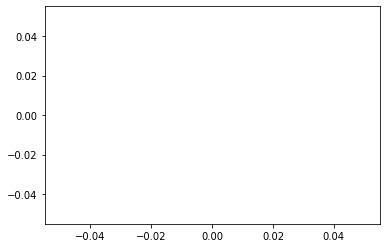

In [ ]:
plt.plot(J_storage)

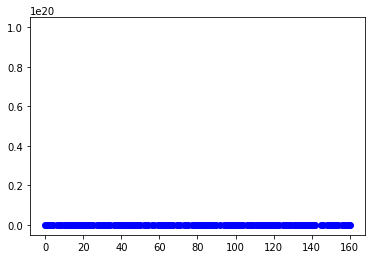

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(list(range(len(df_features_train))), target, color='blue')         
plt.scatter(list(range(len(df_features_test))), pred, color='black')
plt.show()

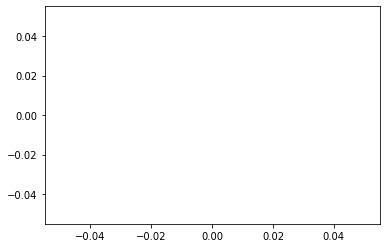

In [ ]:
plt.scatter(x=range(len(J_storage)), y=J_storage)

# Accuracy Metrics

In [ ]:
# Calculate r^2
# change target test set to a numpy array
target = df_target_test.to_numpy()
# Calculate r2 score by calling a function
r2 = r2_score(target, pred)
print(r2)

# Calculate MSE
mse = mean_squared_error(target, pred)
print(mse)

# Task 2

Task 2: You are free to find and define a problem (apply the discovery and define phases first, from the UK Design Council Double Diamond, 3.007 Design Thinking and Innovation) of your interest related to COVID-19. The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression, which means you can work with either continuous numerical data or classification.
* Find an interesting problem which you want to solve either using Linear Regression or Classification (please check with your instructors first on whether the problem makes sense).
* Find a dataset to build your model. For example, you can use Kaggle
(https://www.kaggle.com/datasets) to find suitable datasets.
* Use plots to visualize and understand your data.
* Create training and test data sets.
* Build your model.
* Choose an appropriate metric to evaluate your model (you may use the same metric as the one used in Task 1).
* Improve your model.

Dataset Source: **insert link here**

Predictor Variables Chosen:
1.   List item
2.   List item

## Interesting Article: https://vibgyorpublishers.org/content/ijior/ijior-3-008.php?jid=ijior

## Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [17]:
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

Cloning into 't3-2d-ddw'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 53 (delta 24), reused 39 (delta 15), pack-reused 0
Unpacking objects: 100% (53/53), done.


In [19]:
# Import dataset
file_url = 't3-2d-ddw/task-2/merged/combined.csv'
df_task_2 = pd.read_csv(file_url)
df_task_2.reset_index(drop=True, inplace=True)

# df_task_2["total_cases"] = df["total_cases"]
# df.dropna()

# # converting location to categories
# df['location'] = df['location'].astype('category')
# df['location'] = df['location'].cat.codes 

In [24]:
countries_list = df_task_2['Code'].unique()
countries_list

array(['ALB', 'DZA', 'AND', 'AUS', 'AUT', 'AZE', 'BHS', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BIH', 'BWA', 'BRA',
       'BRN', 'BGR', 'BDI', 'KHM', 'CAN', 'CPV', 'TCD', 'CHN', 'COL',
       'COG', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE', 'DNK', 'DJI', 'DOM',
       'ECU', 'EGY', 'SLV', 'ERI', 'SWZ', 'ETH', 'FRO', 'FIN', 'FRA',
       'GAB', 'GEO', 'DEU', 'GRC', 'GRL', 'GUM', 'GTM', 'GUY', 'HTI',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'KAZ', 'KEN', 'KIR', 'KGZ', 'LAO', 'LVA', 'LBN', 'LBR',
       'LIE', 'LTU', 'LUX', 'MAC', 'MWI', 'MYS', 'MLT', 'MRT', 'MUS',
       'MEX', 'MCO', 'MNG', 'MAR', 'MOZ', 'NLD', 'NGA', 'NOR', 'PNG',
       'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SMR', 'SAU', 'SRB', 'SLE',
       'SGP', 'SLB', 'SOM', 'ZAF', 'KOR', 'ESP', 'SWE', 'CHE', 'TZA',
       'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'ZMB',
       'ZWE'], dtype=object)

In [16]:
df_task_2.to_csv("df_task_2.csv")

## Pre-Process Data

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Working_With_Data.ipynb

In [5]:
def normalize_z(df):
    mean = df.mean(axis=0)
    std = df.std(axis=0)
    dfout = (df - mean) / std
    return dfout

def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:, feature_names]
    df_target = df.loc[:, target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    cols = len(df_feature.columns)
    np_feature = df_feature.to_numpy().reshape(-1, cols)
    constants = np.ones(shape=(np_feature.shape[0], 1))
    return np.concatenate((constants, np_feature), axis=1)

def prepare_target(df_target):
    cols = len(df_target.columns)
    np_target = df_target.to_numpy().reshape(-1, cols)
    return np_target

def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    np_X = prepare_feature(df_feature)
    return predict_norm(np_X, beta)

def predict_norm(X, beta):
    y_pred = np.matmul(X, beta)
    return y_pred
    
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    # returns the indexes, which is the number of rows
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)

    # k = length / size of the test array
    k = int(test_size * len(indexes))

    test_index = np.random.choice(indexes, k, replace=False)
    train_index = list(set(indexes) - set(test_index))
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]

    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    res = np.sum((y - ypred) ** 2)
    ymean = np.mean(y)
    tot = np.sum((y - ymean) ** 2)
    r2 = 1- res/tot
    print(r2)
    return r2

def mean_squared_error(target, pred):
    ysum = np.sum((target - pred) ** 2)
    n = target.shape[0]
    return ysum/n

In [7]:
df.columns

Index(['Entity', 'Code', 'Day', 'testing_policy', 'vaccination_policy',
       'facial_coverings', 'restriction_gatherings', 'stay_home_requirements'],
      dtype='object')

In [ ]:
# Extract features and targets
x_cols = ['testing_policy', 'vaccination_policy','facial_coverings', 'restriction_gatherings', 'stay_home_requirements']
y_cols = []
df_features, df_target = get_features_targets(df, x_cols, y_cols)

# Normalize using z normalization
df_features = normalize_z(df_features)

## Plots

For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/Visualization.ipynb


## Linear Regression
For more information, refer to https://github.com/Data-Driven-World/d2w_notes/blob/master/LinearRegression.ipynb

In [ ]:
def hypothesis(X, beta):
  ''' 
    hypothesis equation - returns y_hat
    :param X: array, features
    :param beta: array, weights
    :return float
  '''
  # @ is used for matrix multiplication?
  return np.matmul(X, beta)

def cost_function(X, y, beta):
  ''' 
    cost function - returns cost J ((sum of (y_hat - original y)^2)/2m)
    :param X: array, features
    :param y: array, true values
    :param beta: array, weights
    :return float
  '''
    J = 0
    m = X.shape[0]
    y_hat = np.matmul(X, beta)
    J = np.sum((y_hat - y) ** 2)/(2*m)
    error = np.matmul(X, beta) - y
    J = np.matmul(error.T, error)
    J = J / (2*m)
    return J

def gradient_descent(X, y, beta, alpha, num_iters):
    ''' 
    gradient descent - 
    :param X: array, features
    :param y: array, true values
    :param beta: array, weights
    :param alpha: float, learning rate
    :param iterations: int, number of iterations
    :return float, float
  '''
    # m = number of data points
    m = X.shape[0]
    #cost function in each iteration
    J = np.zeros((num_iters, 1)) 
    k = 0
    while k < num_iters:        
        y_hat = hypothesis(X, beta)
        deriv = np.matmul(X.T, (y_hat - y))    
        beta = beta - alpha/m * deriv
        J_storage[k] = compute_cost(X, y, beta)
        k += 1
    return beta, J

In [ ]:
# Extract features and targets
x_cols = []
y_cols = []
df_features, df_target = get_features_targets(df, x_cols, y_cols)

# Normalize using z normalization
df_features = normalize_z(df_features)

# Split the data set into training and test
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# Normalize the features using z normalization
df_features_train_z = normalize_z(df_features_train)

# Change the features and the target to numpy array using the prepare functions
X = prepare_feature(df_features_train_z)
target = prepare_target(df_target_train)

iterations = 1500
alpha = 0.01
beta = np.zeros(((X.shape[1], 1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict() method
pred = predict(df_features_test, beta)

In [ ]:
y_hat = hypothesis(beta, X)
y_hat = np.sum(y_hat, axis=1)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 47)),y=y, color='blue')         
plt.scatter(x=list(range(0, 47)), y=y_hat, color='black')
plt.show()

In [ ]:
plt.scatter(x=list(range(0, 10000)), y=J)

# Accuracy Metrics

In [ ]:
# Calculate r^2
# change target test set to a numpy array
target = df_target_test.to_numpy()
# Calculate r2 score by calling a function
r2 = r2_score(target, pred)
print(r2)

# Calculate MSE
mse = mean_squared_error(target, pred)
print(mse)

From: https://towardsdatascience.com/master-machine-learning-multiple-linear-regression-from-scratch-with-python-ac716a9b78a4


In [ ]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate # alpha
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights (beta) and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

# Preprocessing (Can delete later)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!git clone https://github.com/kelliesyhh/t3-2d-ddw.git

fatal: destination path 't3-2d-ddw' already exists and is not an empty directory.


In [20]:
df_vac = pd.read_csv("t3-2d-ddw/task-2/covid-vaccination-policy.csv")
df_vac.name = "df_vac"
df_test = pd.read_csv("t3-2d-ddw/task-2/covid-19-testing-policy.csv")
df_test.name = "df_test"
df_face = pd.read_csv("t3-2d-ddw/task-2/face-covering-policies-covid.csv")
df_face.name = "df_face"
df_public = pd.read_csv("t3-2d-ddw/task-2/public-gathering-rules-covid.csv")
df_public.name = "df_public"
df_stay = pd.read_csv("t3-2d-ddw/task-2/stay-at-home-covid.csv")
df_stay.name = "df_stay"

In [21]:
dataframes = [df_vac, df_test, df_face, df_public, df_stay]

In [ ]:
pd.merge(df_vac, df_test, "outer").to_csv("df_vac_test.csv")
pd.merge(df_test, df_face, "outer").to_csv("df_test_face.csv")
pd.merge(df_face, df_public, "outer").to_csv("df_face_public.csv")
pd.merge(df_public, df_stay, "outer").to_csv("df_public_stay.csv")
pd.merge(df_stay, df_vac, "outer").to_csv("df_stay_vac.csv")

In [22]:
df_vac_test = pd.merge(df_vac, df_test, "outer")
df_test_face = pd.merge(df_test, df_face, "outer")
df_face_public = pd.merge(df_face, df_public, "outer")
df_public_stay = pd.merge(df_public, df_stay, "outer")
df_stay_vac = pd.merge(df_stay, df_vac, "outer")

In [27]:
def merge_and_save(dataframes):
  for idx in range(len(dataframes)):
    if idx == 4:
      df_merged = pd.merge(dataframes[idx], dataframes[0], "outer")
      missing_indices = list(np.where(pd.isnull(df_merged))[0])
      filename = "missing_" + dataframes[idx].name + "_" + dataframes[0].name + ".csv"
      df_merged.iloc[missing_indices, :].to_csv(filename)  
    
    df_merged = pd.merge(dataframes[idx], dataframes[idx+1], "outer")
    missing_indices = list(np.where(pd.isnull(df_merged))[0])
    filename = "missing_" + dataframes[idx].name + "_" + dataframes[idx+1].name + ".csv"
    df_merged.iloc[missing_indices, :].to_csv(filename)

In [8]:
missing_indices = np.where(pd.isnull(df_vac_test))[0]
missing_indices = missing_indices.tolist()

In [ ]:
pd.to_csv(df_vac_test.iloc[missing_indices, :])

In [36]:
from functools import reduce
df_merged = reduce(lambda left,right: pd.merge(left, right, how='outer'), dataframes)
# df_merged = pd.concat(data_frames, join='outer')
pd.to_csv(df_vac_test.iloc[missing_indices, :])

(124608, 8)
(124608, 8)


In [ ]:
np.where(pd.isnull(df_merged))

(array([     0,      0,      0, ..., 620994, 620994, 620994]),
 array([4, 5, 6, ..., 4, 5, 6]))

In [53]:
missing_indices = np.where(pd.isnull(df_merged))[0]
missing_indices = missing_indices.tolist()

In [54]:
df_missing = df_merged.loc[missing_indices, :]

In [55]:
df_missing.to_csv("missing_df_all.csv")

In [56]:
unique_countries = list(df_missing['Entity'].unique())
unique_codes = list(df_missing['Code'].unique())
print(unique_countries, unique_codes)

['Afghanistan', 'Angola', 'Argentina', 'Aruba', 'Bahrain', 'Bolivia', 'Burkina Faso', 'Cameroon', 'Central African Republic', 'Comoros', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Dominica', 'Estonia', 'Fiji', 'Gambia', 'Ghana', 'Guinea', 'Honduras', 'Hong Kong', 'Kuwait', 'Lesotho', 'Madagascar', 'Moldova', 'Myanmar', 'Namibia', 'Nepal', 'New Zealand', 'Nicaragua', 'Niger', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Puerto Rico', 'Senegal', 'Slovakia', 'Slovenia', 'South Sudan', 'Sri Lanka', 'Sudan', 'Syria', 'Taiwan', 'Thailand', 'Timor', 'Trinidad and Tobago', 'Tunisia', 'Turkmenistan', 'Ukraine', 'United States Virgin Islands', 'Chile', 'Iraq', 'Jordan', 'Kosovo', 'Libya', 'Mali', 'Palestine', 'Suriname', 'Tajikistan', 'Togo', 'Tonga', 'Turkey', 'Uganda', 'Yemen', 'Seychelles', 'Rwanda'] ['AFG', 'AGO', 'ARG', 'ABW', 'BHR', 'BOL', 'BFA', 'CMR', 'CAF', 'COM', 'CIV', 'COD', 'DMA', 'EST', 'FJI', 'GMB', 'GHA', 'GIN', 'HND', 'HKG', 'KWT', 'LSO', 'MDG', 'MDA'

In [61]:
count_blanks = {}
for code in unique_codes:
  count_blanks[code] = df_missing.loc[df_missing['Code'] == code,'Code'].agg(['nunique','count','size'])

print(count_blanks)

{'AFG': nunique    1
count      2
size       2
Name: Code, dtype: int64, 'AGO': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'ARG': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'ABW': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'BHR': nunique     1
count      14
size       14
Name: Code, dtype: int64, 'BOL': nunique     1
count      66
size       66
Name: Code, dtype: int64, 'BFA': nunique     1
count      15
size       15
Name: Code, dtype: int64, 'CMR': nunique    1
count      1
size       1
Name: Code, dtype: int64, 'CAF': nunique     1
count      22
size       22
Name: Code, dtype: int64, 'COM': nunique       1
count      1082
size       1082
Name: Code, dtype: int64, 'CIV': nunique    1
count      9
size       9
Name: Code, dtype: int64, 'COD': nunique     1
count      14
size       14
Name: Code, dtype: int64, 'DMA': nunique     1
count      12
size       12
Name: Code, dtype: int64, 'EST': nunique     1
count      15
s